In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [123]:
#Q1: Import a 311 NYC service request.
#Q2 : Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

col_names =['Created Date','Closed Date','Complaint Type','Location Type']

NYC = pd.read_csv('C:/Users/Gautham/Datasets/NYC.csv',usecols=col_names,low_memory=False)

In [124]:
NYC['Created Date'] = pd.to_datetime(NYC['Created Date'])
NYC['Closed Date'] = pd.to_datetime(NYC['Closed Date'])


In [139]:
NYC.isna().sum().sum()
NYC.replace(['None','nan','NaN'], np.nan, inplace=True)
NYC = NYC.dropna()
NYC.isna().sum().sum()

0

In [ ]:
#Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

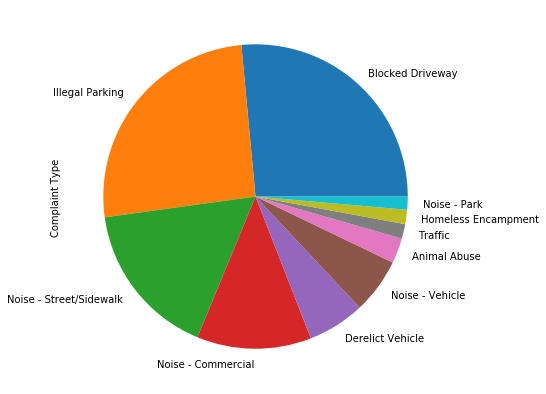

In [98]:
NYC['Complaint Type'].value_counts().head(10).plot(kind='pie',figsize=(15,7))
plt.show()

# Most commom complaits types are Illegal parking, Blocked Drivewat and Noise- Stree/Sidewalk 

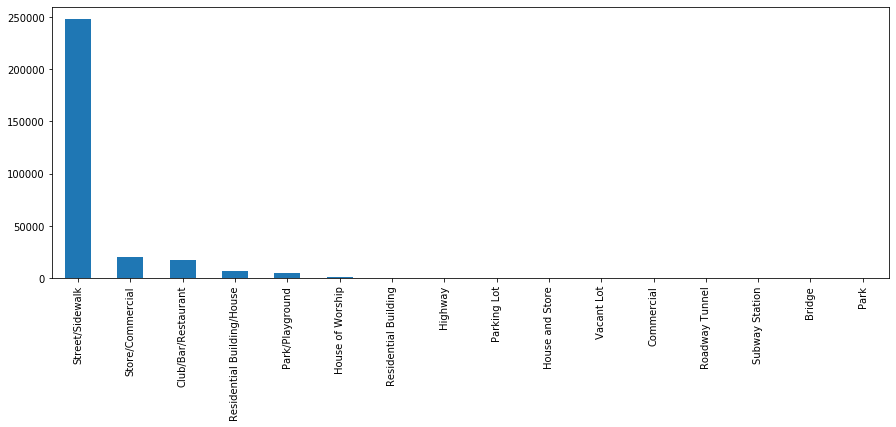

In [235]:
NYC['Location Type'].value_counts().plot(kind='bar',figsize=(15,5))

# Most common Location type the complaints have come from is Strret sidewalk and the complaint count is 247503

In [10]:
NYC['Location Type'].value_counts() # Complaints number based on loction type

Street/Sidewalk               247503
Store/Commercial               20183
Club/Bar/Restaurant            17227
Residential Building/House      6953
Park/Playground                 4751
House of Worship                 927
Residential Building             227
Highway                          214
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Name: Location Type, dtype: int64

In [165]:
NYC['Request_Closing_Time']= NYC['Closed Date']-NYC['Created Date']

In [141]:
max(NYC['Request_Closing_Time']) # Highest waiting time by a complaint is 24 days and 16 hours 

Timedelta('24 days 16:52:22')

In [142]:
#Q4 Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [219]:
agg_values = NYC.groupby(['Location Type','Complaint Type'])['Request_Closing_Time'].mean(numeric_only=False)
agg_values =agg_values.to_frame()
agg_values = agg_values.add_prefix('Average_').reset_index()

In [223]:
agg_values['Average_Request_Closing_Time'] = agg_values['Average_Request_Closing_Time'].astype('timedelta64[h]')
agg_values['Average_Request_Closing_Time']

0     3.0
1     4.0
2     3.0
3     7.0
4     5.0
     ... 
64    3.0
65    4.0
66    3.0
67    1.0
68    7.0
Name: Average_Request_Closing_Time, Length: 69, dtype: float64

In [236]:
#Delta_time_hrs = NYC['Request_Closing_Time'].astype('timedelta64[h]')
#pop_mean = round(Delta_time_hrs.mean(),2) # mean of delta time is 3.82 hours 
pop_mean =  NYC['Request_Closing_Time'].mean()
pop_mean = pop_mean.total_seconds()
pop_mean = pop_mean/3600
pop_mean

4.3142515203

In [224]:
agg_values['Average_Request_Closing_Time'] = agg_values['Average_Request_Closing_Time'].astype(int)

In [226]:
#Whether the average response time across complaint types is similar or not (overall)

#Ho : average response time across complaint types is similar. 
#H1 : average response time across complaint types is not similar

#inference:
#H1 is significant because mean of Request_Closing_Time are not same and also not same  as popmean which is ~4
#mean of delat time(ie: Request_Closing_Time) are as below, Their values are different

agg_values['Average_Request_Closing_Time'].unique()

array([  3,   4,   7,   5,   8, 336,   1,   2,  17,  12])

In [ ]:
#5b  Are the type of complaint or service requested and location related?

#H0:  type of complaint requested and location are  related
#H1: Type of complaint and location are not related

#COnclusion: P value are greater than 0.05. Null hypothsis is significant at 5%. Type of complaint and location are related 

In [217]:
crosstab_nyc = pd.crosstab(x,y)
crosstab_nyc

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Animal Abuse,0,0,1,0,1,0,0,1,1,1,1,0,1,1,1,0
Animal in a Park,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Derelict Vehicle,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
Drinking,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0
Graffiti,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
Homeless Encampment,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0


In [218]:
from scipy.stats import chisquare
stat,p = chisquare(crosstab_nyc)
print(stat)

[21. 19. 21. 19. 21. 21. 21. 14. 20. 21. 11. 19. 10.  4. 20. 21.]


In [49]:
print(p)

[0.45894421 0.58514009 0.45894421 0.58514009 0.45894421 0.45894421
 0.45894421 0.86959927 0.52126125 0.45894421 0.96278682 0.58514009
 0.97891186 0.99998013 0.52126125 0.45894421]
